In [1]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("financial_transactions.csv")
print(df.head())

   transaction_id        date  customer_id   amount    type  \
0               1  26-10-2020          NaN      NaN  credit   
1               2  08-01-2020        466.0  1255.95  credit   
2               3  02-09-2019        110.0  7969.68   debit   
3               4  02-12-2020        142.0  2927.41  credit   
4               5  02-12-2020        944.0  4661.88   debit   

                                         description  
0                 Expect series shake art again our.  
1               Each left similar likely coach take.  
2  Direction wife job pull determine leader move ...  
3                    Agree reveal buy black already.  
4       Child relationship show college whom speech.  


In [3]:
df = df.dropna(subset=['customer_id'])
df['customer_id'] = df['customer_id'].astype(int)
df['amount'] = df['amount'].fillna(0)
print(df.head())

   transaction_id        date  customer_id   amount    type  \
1               2  08-01-2020          466  1255.95  credit   
2               3  02-09-2019          110  7969.68   debit   
3               4  02-12-2020          142  2927.41  credit   
4               5  02-12-2020          944  4661.88   debit   
5               6  25-04-2021          900  3649.68  credit   

                                         description  
1               Each left similar likely coach take.  
2  Direction wife job pull determine leader move ...  
3                    Agree reveal buy black already.  
4       Child relationship show college whom speech.  
5                                Century front item.  


In [4]:
customer_data = df.groupby('customer_id').agg(
    total_amount=('amount', 'sum'),
    avg_transaction_amount=('amount', 'mean'),
    num_transactions=('amount', 'count')
).reset_index()
print(customer_data.head())

   customer_id  total_amount  avg_transaction_amount  num_transactions
0            1     481760.83             4966.606495                97
1            2     493403.13             4699.077429               105
2            3     547765.88             5071.906296               108
3            4     505827.29             5558.541648                91
4            5     527998.55             4934.565888               107


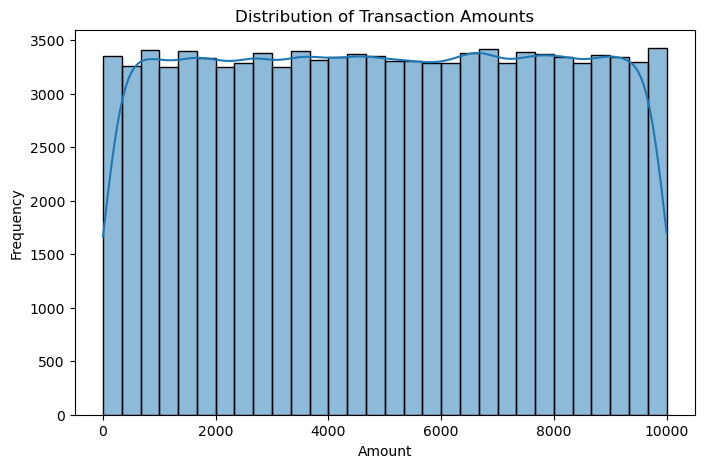

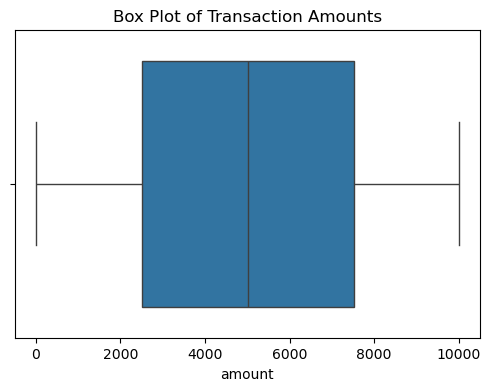

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.histplot(df['amount'], bins=30, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['amount'])
plt.title('Box Plot of Transaction Amounts')
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(customer_data[["total_amount", "avg_transaction_amount", "num_transactions"]])

In [7]:
gmm = GaussianMixture(n_components=3, random_state=42)
customer_data["cluster"] = gmm.fit_predict(X_scaled)  # Now, customer_data is defined

# Display the output
print(customer_data.head())

C:\Users\Yalamanchili Siddu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


   customer_id  total_amount  avg_transaction_amount  num_transactions  \
0            1     481760.83             4966.606495                97   
1            2     493403.13             4699.077429               105   
2            3     547765.88             5071.906296               108   
3            4     505827.29             5558.541648                91   
4            5     527998.55             4934.565888               107   

   cluster  
0        0  
1        0  
2        1  
3        2  
4        0  


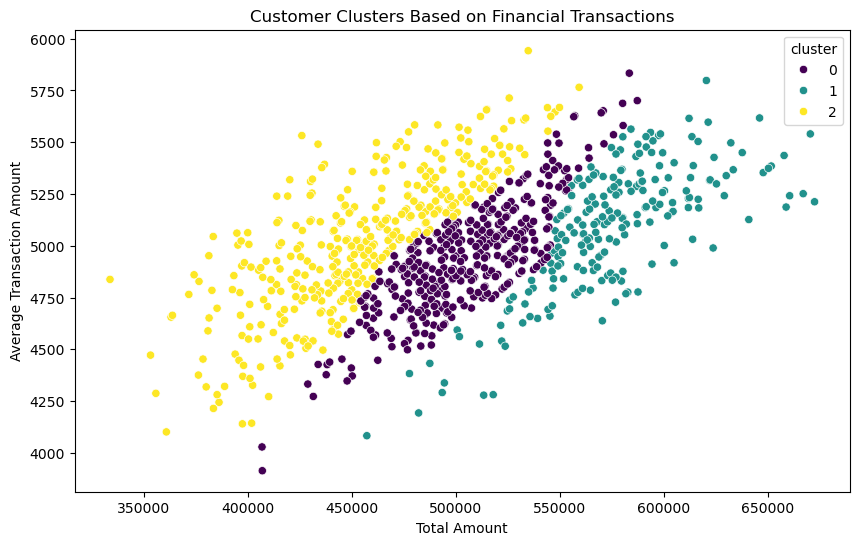

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=customer_data["total_amount"], y=customer_data["avg_transaction_amount"], hue=customer_data["cluster"], palette="viridis")
plt.xlabel("Total Amount")
plt.ylabel("Average Transaction Amount")
plt.title("Customer Clusters Based on Financial Transactions")
plt.show()

In [10]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
silhouette_avg = silhouette_score(X_scaled, customer_data["cluster"])
calinski_score = calinski_harabasz_score(X_scaled, customer_data["cluster"])
davies_bouldin = davies_bouldin_score(X_scaled, customer_data["cluster"])
accuracy_score = (silhouette_avg + 1) * 50
print("\n🔹 GMM Clustering Evaluation")
print(f"Silhouette Score: {silhouette_avg:.4f}")
print(f"Calinski-Harabasz Score: {calinski_score:.2f}")
print(f"Davies-Bouldin Score: {davies_bouldin:.4f} (lower is better)")
print(f"Estimated Clustering Accuracy: {accuracy_score:.2f}%")



🔹 GMM Clustering Evaluation
Silhouette Score: 0.2472
Calinski-Harabasz Score: 455.17
Davies-Bouldin Score: 1.3132 (lower is better)
Estimated Clustering Accuracy: 62.36%
